#Prueba 1
Nombre: Christian Rivera, 
Carrera: Computacion



In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import plotly.express as px 

In [2]:
url = '/content/drive/MyDrive/Simulacion/1.Poblaciones.csv'
df = pd.read_csv(url,encoding='latin1', sep=';',skiprows=2)
df = df.drop(df.columns[[8,9,10,11,12,13,14,15,16,17,18]],axis=1)
df.rename(columns ={'Unnamed: 0':'Encuesta','Unnamed: 1':'Periodo','Unnamed: 2':'Indicadores'}, inplace = True)
df

,Encuesta,Periodo,Indicadores,Total,Urbana,Rural,Hombre,Mujer
0,ENEMDU,dic-07,Población Total,13.682.302,9.066.209,4.616.093,6.768.646,6.913.656
1,ENEMDU,dic-07,Población menor de 15 años,4.372.812,2.723.124,1.649.688,2.226.618,2.146.194
2,ENEMDU,dic-07,Población en Edad de Trabajar (PET),9.309.490,6.343.085,2.966.404,4.542.028,4.767.462
3,ENEMDU,dic-07,Población Económicamente Activa,6.336.029,4.227.702,2.108.328,3.777.232,2.558.798
4,ENEMDU,dic-07,Empleo,6.019.332,3.971.040,2.048.292,3.632.314,2.387.018
...,...,...,...,...,...,...,...,...
895,ENEMDU*,oct-21,Desempleo Abierto,336.101,291.606,44.495,150.276,185.824
896,ENEMDU*,oct-21,Desempleo Oculto,48.103,27.600,20.503,25.975,22.128
897,ENEMDU*,oct-21,Desempleo Cesante,298.846,257.856,40.991,140.223,158.623
898,ENEMDU*,oct-21,Desempleo Nuevo,85.358,61.351,24.007,36.028,49.330


En esta seccion se tratará la informacion de nuestro dataframe para posteriormente realizar un analisis mediante las herramientas que nos proporciona Python.

In [3]:
def EliminarPuntos(x):
  return int(x.replace(".",""))

#Funciones para castear
def GetCastinInt(x):
  return int(x)

def GetCastinString(x):
  return str(x)

In [4]:
df["Total"] = df["Total"].apply(EliminarPuntos)

In [5]:
df.head(5)

,Encuesta,Periodo,Indicadores,Total,Urbana,Rural,Hombre,Mujer
0,ENEMDU,dic-07,Población Total,13682302,9.066.209,4.616.093,6.768.646,6.913.656
1,ENEMDU,dic-07,Población menor de 15 años,4372812,2.723.124,1.649.688,2.226.618,2.146.194
2,ENEMDU,dic-07,Población en Edad de Trabajar (PET),9309490,6.343.085,2.966.404,4.542.028,4.767.462
3,ENEMDU,dic-07,Población Económicamente Activa,6336029,4.227.702,2.108.328,3.777.232,2.558.798
4,ENEMDU,dic-07,Empleo,6019332,3.971.040,2.048.292,3.632.314,2.387.018


In [6]:
def ObtenerAnio(i):
  respuesta= i.split("-")
  return respuesta[1]

In [7]:
df["Periodo"] = df["Periodo"].apply(ObtenerAnio)

In [8]:
df.head(5)

,Encuesta,Periodo,Indicadores,Total,Urbana,Rural,Hombre,Mujer
0,ENEMDU,07,Población Total,13682302,9.066.209,4.616.093,6.768.646,6.913.656
1,ENEMDU,07,Población menor de 15 años,4372812,2.723.124,1.649.688,2.226.618,2.146.194
2,ENEMDU,07,Población en Edad de Trabajar (PET),9309490,6.343.085,2.966.404,4.542.028,4.767.462
3,ENEMDU,07,Población Económicamente Activa,6336029,4.227.702,2.108.328,3.777.232,2.558.798
4,ENEMDU,07,Empleo,6019332,3.971.040,2.048.292,3.632.314,2.387.018


In [9]:
dataFrame =df[['Periodo','Indicadores','Total']].groupby(['Periodo','Indicadores'], as_index=False).mean()
dataFrame

,Periodo,Indicadores,Total
0,07,Desempleo,316697.0
1,07,Desempleo Abierto,193225.0
2,07,Desempleo Cesante,190044.0
3,07,Desempleo Nuevo,126653.0
4,07,Desempleo Oculto,123472.0
...,...,...,...
266,21,Población en Edad de Trabajar (PET),12655772.8
267,21,Población menor de 15 años,5150507.2
268,21,Subempleo,1933593.1
269,21,Subempleo por insuficiencia de ingresos,211003.9


In [10]:
TotalDataFrame = dataFrame[dataFrame.Indicadores.isin(["Desempleo","Empleo","Total"])]
TotalDataFrame.head(5)

,Periodo,Indicadores,Total
0,07,Desempleo,316697.0
5,07,Empleo,6019332.0
18,08,Desempleo,362084.5
23,08,Empleo,6125310.0
36,09,Desempleo,423802.0


In [11]:
EmpleadosDataFrame = dataFrame[dataFrame.Indicadores.isin(["Empleo","Total"])]
DesempleadosDataFrame = dataFrame[dataFrame.Indicadores.isin(["Desempleo","Total"])]

#Persona Empleadas


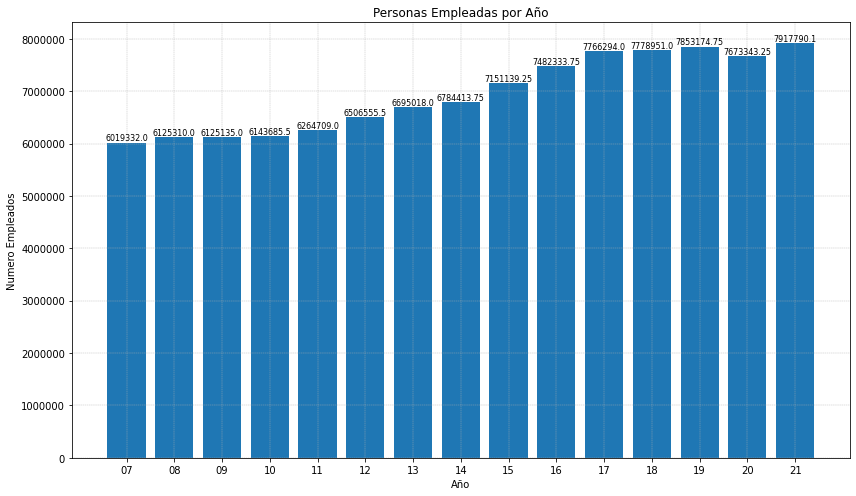

In [12]:
fig, ax = plt.subplots(figsize =(12, 7))
plt.bar( EmpleadosDataFrame["Periodo"],EmpleadosDataFrame["Total"])

try:
    plt.ticklabel_format(axis='y', style='plain')
except AttributeError:
    print('')
plt.title('Personas Empleadas por Año')
plt.xlabel('Año')
plt.ylabel('Numero Empleados')
plt.grid(linestyle='--', linewidth=0.4)
for index,data in enumerate(EmpleadosDataFrame["Total"]):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=8), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Personas Desempleadas

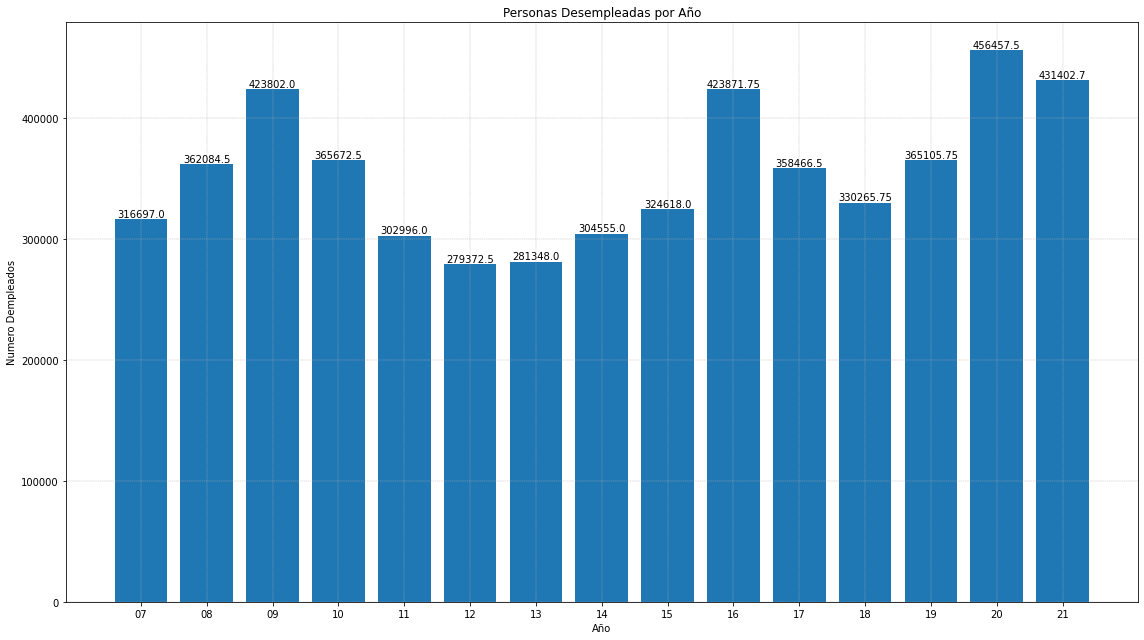

In [13]:
fig, ax = plt.subplots(figsize =(16, 9))
plt.bar(DesempleadosDataFrame["Periodo"],DesempleadosDataFrame["Total"])

try:
    plt.ticklabel_format(axis='y', style='plain')
except AttributeError:
    print('')
plt.title('Personas Desempleadas por Año')
plt.xlabel('Año')
plt.ylabel('Numero Dempleados')
plt.grid(linestyle='--', linewidth=0.4)
for index,data in enumerate(DesempleadosDataFrame["Total"]):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10), ha='center', va='bottom')
plt.tight_layout()
plt.show()

#Personas basadas en la sectorizacion de empleo año 2021

In [14]:
def ObtenerSectores(anio):
   df_new = df;
   df_new['Periodo'] = df_new['Periodo'].apply(GetCastinInt);
   df_new = df_new.query('Periodo == '+str(anio)+'');
   df_new['Periodo'] = df_new['Periodo'].apply(GetCastinString);
   return df_new;

def GraficarPie(datos, etiquetas):
   vec=[]
   vec1=[]
   for x in datos:
      vec.append(x);
   for y in etiquetas:
      vec1.append(y)
      
   fig = px.pie(values=vec, names=vec1) 
   fig.show() 


#Grafica de pastel Sectorizacion de empleo Urbana


In [15]:
Urbano = ObtenerSectores(8).iloc[-18:]
Urbano['Urbana'] = Urbano['Urbana'].apply(EliminarPuntos);

GraficarPie(Urbano['Urbana'], Urbano['Indicadores']);



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#Grafica de pastel Sectorizacion de empleo Rural

In [16]:
Rural = ObtenerSectores(8).iloc[-18:]
Rural['Rural'] = Rural['Rural'].apply(EliminarPuntos);

GraficarPie(Rural['Rural'],Rural['Indicadores']);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#Histograma Subempleo, Empleo pleno y Empleo no pleno por año

In [17]:
TotalDataFrameHistograma = dataFrame[dataFrame.Indicadores.isin(["Subempleo","Empleo Adecuado/Pleno","Otro Empleo no pleno","Total"])]
TotalDataFrameHistograma.head(10)


,Periodo,Indicadores,Total
6,07,Empleo Adecuado/Pleno,2737158.0
9,07,Otro Empleo no pleno,1504000.0
15,07,Subempleo,1155872.0
24,08,Empleo Adecuado/Pleno,2804627.0
27,08,Otro Empleo no pleno,1669021.0
33,08,Subempleo,1044338.5
42,09,Empleo Adecuado/Pleno,2565691.0
45,09,Otro Empleo no pleno,1778578.0
51,09,Subempleo,1071615.0
60,10,Empleo Adecuado/Pleno,2795537.5


In [18]:
DataFrameSublempeo = TotalDataFrameHistograma[TotalDataFrameHistograma.Indicadores.isin(["Subempleo","Total"])]
DataFrameSublempeo.head(5)

,Periodo,Indicadores,Total
15,07,Subempleo,1155872.0
33,08,Subempleo,1044338.5
51,09,Subempleo,1071615.0
69,10,Subempleo,965260.5
87,11,Subempleo,743991.5


#Subempleo

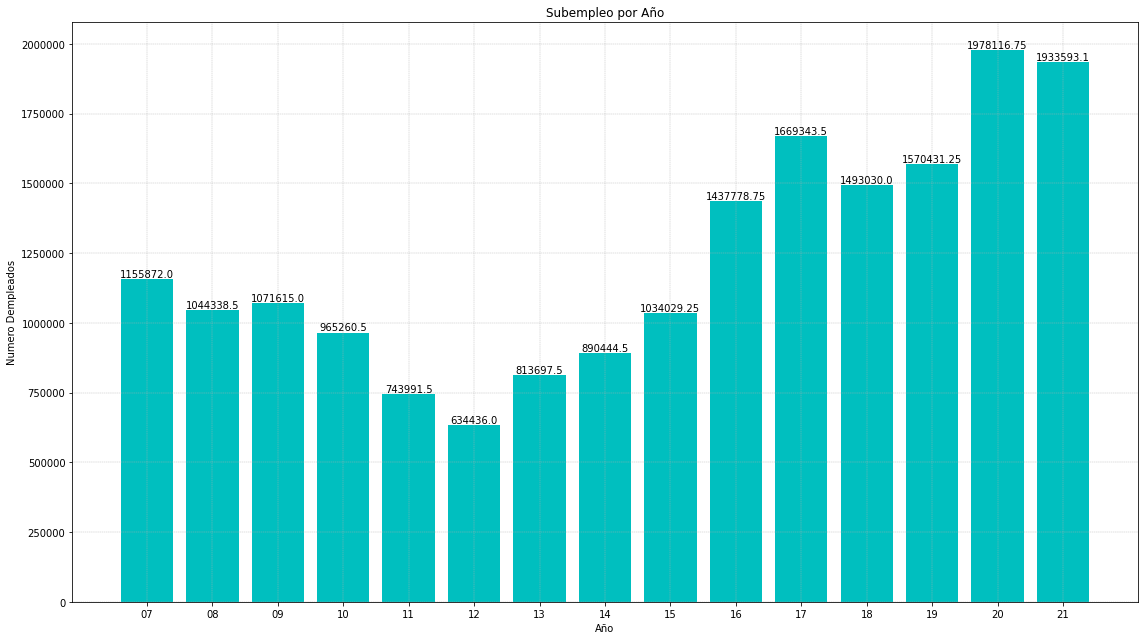

In [19]:
fig, ax = plt.subplots(figsize =(16, 9))
plt.bar(DataFrameSublempeo["Periodo"],DataFrameSublempeo["Total"],color ='c')

try:
    plt.ticklabel_format(axis='y', style='plain')
except AttributeError:
    print('')
plt.title('Subempleo por Año')
plt.xlabel('Año')
plt.ylabel('Numero Dempleados')
plt.grid(linestyle='--', linewidth=0.4)
for index,data in enumerate(DataFrameSublempeo["Total"]):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [20]:
DataFrameEmpleoPleno = TotalDataFrameHistograma[TotalDataFrameHistograma.Indicadores.isin(["Empleo Adecuado/Pleno","Total"])]
DataFrameEmpleoPleno.head(5)

,Periodo,Indicadores,Total
6,07,Empleo Adecuado/Pleno,2737158.0
24,08,Empleo Adecuado/Pleno,2804627.0
42,09,Empleo Adecuado/Pleno,2565691.0
60,10,Empleo Adecuado/Pleno,2795537.5
78,11,Empleo Adecuado/Pleno,2893045.5


#Empleo Pleno

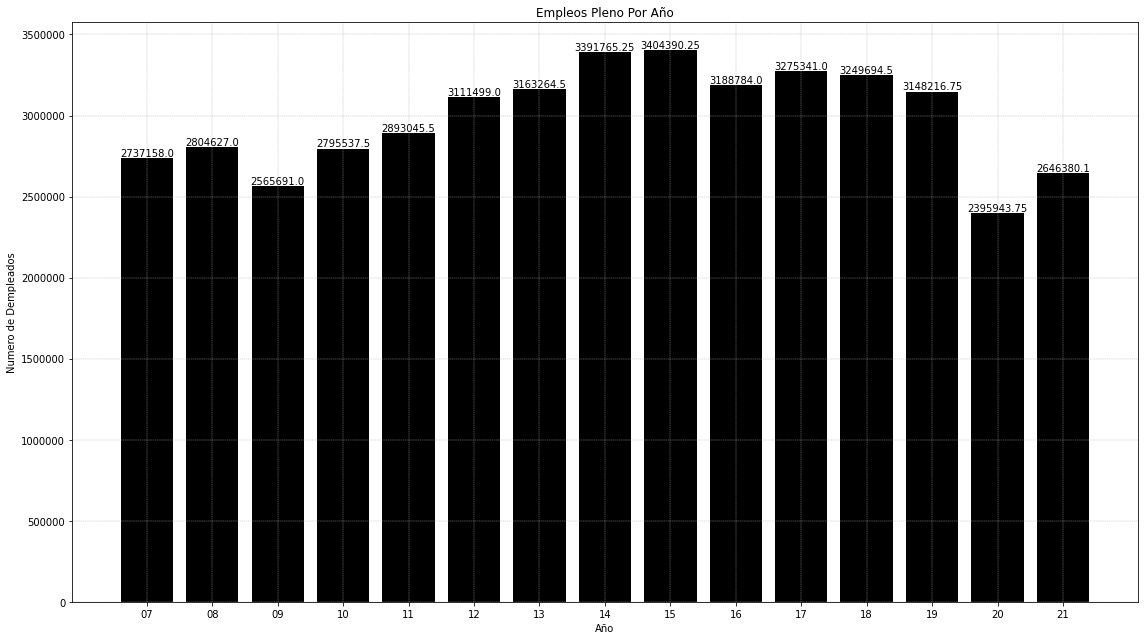

In [21]:
fig, ax = plt.subplots(figsize =(16, 9))
plt.bar(DataFrameEmpleoPleno["Periodo"],DataFrameEmpleoPleno["Total"],color ='k')

try:
    plt.ticklabel_format(axis='y', style='plain')
except AttributeError:
    print('')
plt.title('Empleos Pleno Por Año')
plt.xlabel('Año')
plt.ylabel('Numero de Dempleados')
plt.grid(linestyle='--', linewidth=0.4)
for index,data in enumerate(DataFrameEmpleoPleno["Total"]):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [22]:
DataFrameEmpleoNoPleno = TotalDataFrameHistograma[TotalDataFrameHistograma.Indicadores.isin(["Otro Empleo no pleno","Total"])]
DataFrameEmpleoNoPleno.head(5)

,Periodo,Indicadores,Total
9,07,Otro Empleo no pleno,1504000.0
27,08,Otro Empleo no pleno,1669021.0
45,09,Otro Empleo no pleno,1778578.0
63,10,Otro Empleo no pleno,1788790.5
81,11,Otro Empleo no pleno,2044937.0


#Empleo no pleno

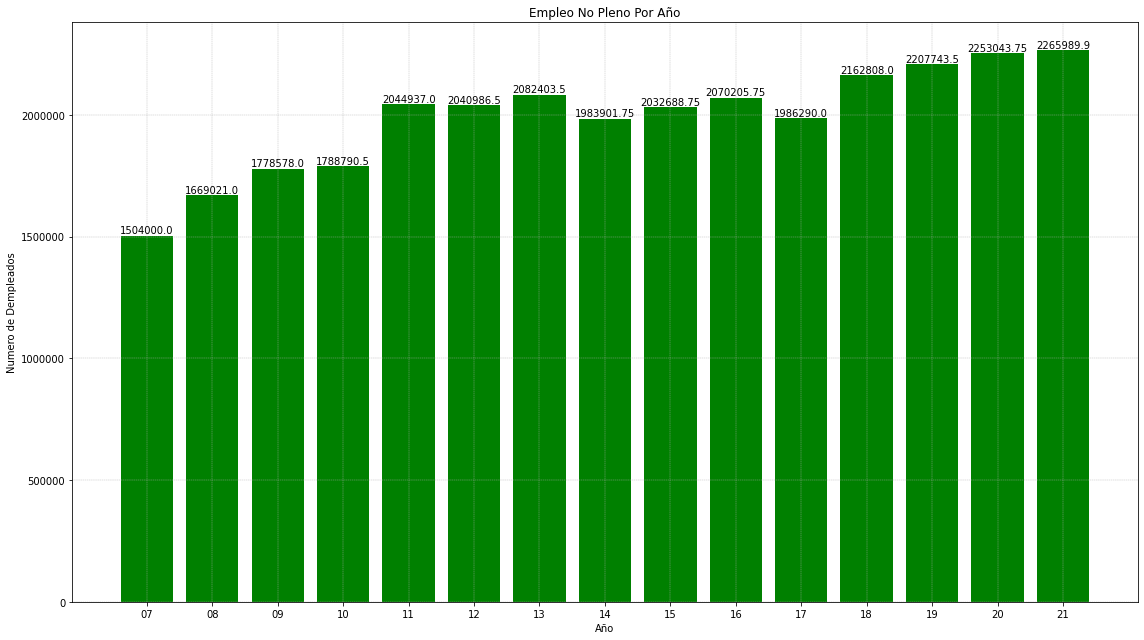

In [23]:
fig, ax = plt.subplots(figsize =(16, 9))
plt.bar(DataFrameEmpleoNoPleno["Periodo"],DataFrameEmpleoNoPleno["Total"],color ='g')

try:
    plt.ticklabel_format(axis='y', style='plain')
except AttributeError:
    print('')
plt.title('Empleo No Pleno Por Año')
plt.xlabel('Año')
plt.ylabel('Numero de Dempleados')
plt.grid(linestyle='--', linewidth=0.4)
for index,data in enumerate(DataFrameEmpleoNoPleno["Total"]):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10), ha='center', va='bottom')
plt.tight_layout()
plt.show()

Histograma Subempleo, Empleo Pleno, Empleo No Pleno


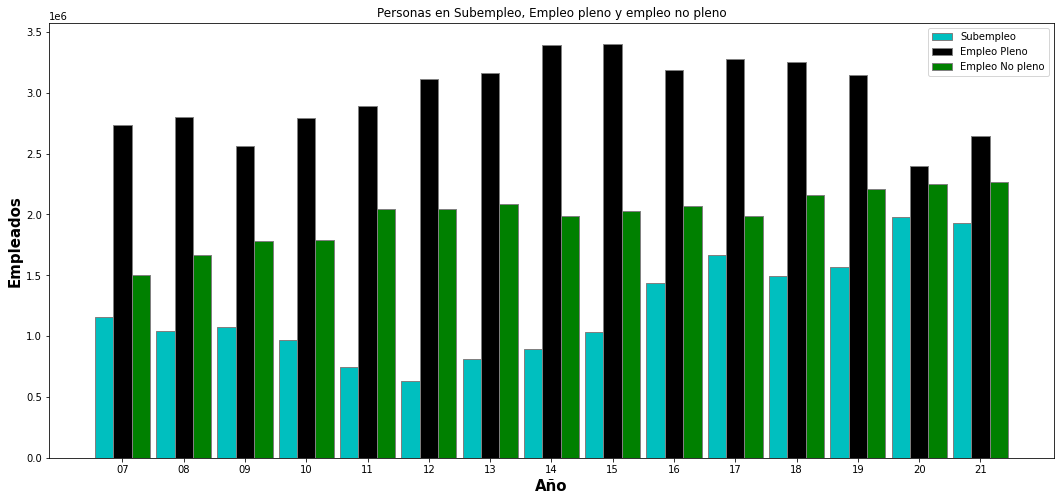

In [38]:
def DatosSumempleoEmpleoPleno():
    barWidth = 0.3
    fig = plt.subplots(figsize =(18, 8))


    IT = np.array(DataFrameSublempeo["Total"])
    ECE = np.array(DataFrameEmpleoPleno["Total"])
    CSE = np.array(DataFrameEmpleoNoPleno["Total"])


    br1 = np.arange(len(IT))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]


    plt.bar(br1, IT, color ='c', width = barWidth,
            edgecolor ='grey', label ='Subempleo')
    plt.bar(br2, ECE, color ='k', width = barWidth,
            edgecolor ='grey', label ='Empleo Pleno')
    plt.bar(br3, CSE, color ='g', width = barWidth,
            edgecolor ='grey', label ='Empleo No pleno')

    plt.xlabel('Año', fontweight ='bold', fontsize = 15)
    plt.ylabel('Empleados', fontweight ='bold', fontsize = 15)
    plt.title('Personas en Subempleo, Empleo pleno y empleo no pleno')
    plt.xticks([r + barWidth for r in range(len(IT))],
            np.array(DataFrameEmpleoNoPleno["Periodo"]))
 
    plt.legend()
    plt.show()
    return fig
DatosSumempleoEmpleoPleno();

#Reportes Parametrizados



En esta seccion se implementará metodos que permitiran recibir datos por consola y realizar una busqueda personalizada del analisis de datos de la Población del Ecuador.

In [25]:
#Mensaje
def imrimirMensaje():
  num = 7
  for x in range(15):
    if num >= 10:
      print("Ingrese",num,"para el año 20",num);
    else:
      print("Ingrese",num,"para el año 200",num);
    num = num+1;


In [26]:
#Funcion para obtener Dataset
def GetDataset(fechaInicio, fechaFin):
  df_new = dataFrame;
  df_new['Periodo'] = df_new['Periodo'].apply(GetCastinInt);
  df_new = dataFrame.query('Periodo >='+str(fechaInicio)+'& Periodo <= '+ str(fechaFin)+' ')
  df_new['Periodo'] = df_new['Periodo'].apply(GetCastinString);
  return df_new;


In [27]:
#Funcion para graficar

def GraficarHistograma(Periodo, Total, etiqueta):
  fig, ax = plt.subplots(figsize =(12, 7))
  plt.bar( Periodo,Total)

  try:
      plt.ticklabel_format(axis='y', style='plain')
  except AttributeError:
      print('')
  plt.title('Personas '+ etiqueta +' por Año')
  plt.xlabel('Año')
  plt.ylabel('Numero Empleados')
  plt.grid(linestyle='--', linewidth=0.4)
  for index,data in enumerate(Total):
      plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=8), ha='center', va='bottom')
  plt.tight_layout()
  plt.show()

Buscar Personas Empleadas
Ingrese el rango en el que quiera buscar (Años)
Ingrese 7 para el año 200 7
Ingrese 8 para el año 200 8
Ingrese 9 para el año 200 9
Ingrese 10 para el año 20 10
Ingrese 11 para el año 20 11
Ingrese 12 para el año 20 12
Ingrese 13 para el año 20 13
Ingrese 14 para el año 20 14
Ingrese 15 para el año 20 15
Ingrese 16 para el año 20 16
Ingrese 17 para el año 20 17
Ingrese 18 para el año 20 18
Ingrese 19 para el año 20 19
Ingrese 20 para el año 20 20
Ingrese 21 para el año 20 21
Ingrese fecha de inicio
7
Ingrese fecha de fin
10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



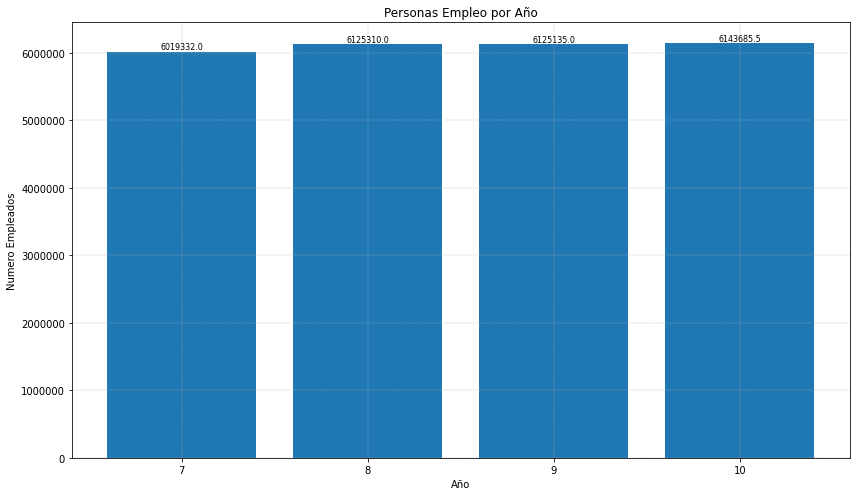

In [28]:
217#Buscar Personas Empleadas
print("Buscar Personas Empleadas")
print("Ingrese el rango en el que quiera buscar (Años)")
imrimirMensaje();
print("Ingrese fecha de inicio")
fechaInicio = input();
print("Ingrese fecha de fin")
fechaFin = input();

DatosEmpleados = GetDataset(fechaInicio, fechaFin);
DatosEmpleados = DatosEmpleados[DatosEmpleados.Indicadores.isin(["Empleo","Total"])]
GraficarHistograma(DatosEmpleados['Periodo'], DatosEmpleados['Total'], 'Empleo')

Buscar Personas Desempleo
Ingrese el rango en el que quiera buscar (Años)
Ingrese 7 para el año 200 7
Ingrese 8 para el año 200 8
Ingrese 9 para el año 200 9
Ingrese 10 para el año 20 10
Ingrese 11 para el año 20 11
Ingrese 12 para el año 20 12
Ingrese 13 para el año 20 13
Ingrese 14 para el año 20 14
Ingrese 15 para el año 20 15
Ingrese 16 para el año 20 16
Ingrese 17 para el año 20 17
Ingrese 18 para el año 20 18
Ingrese 19 para el año 20 19
Ingrese 20 para el año 20 20
Ingrese 21 para el año 20 21
Ingrese fecha de inicio
7
Ingrese fecha de fin
21


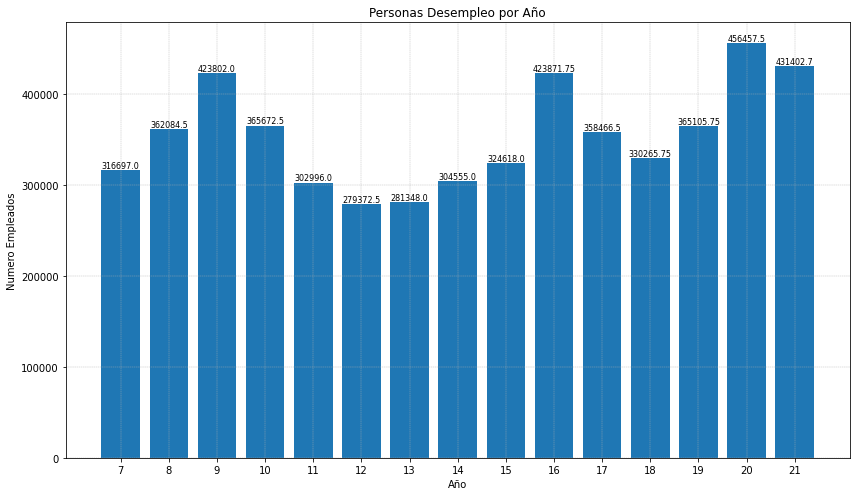

In [29]:
#Buscar Personas Desempleados
print("Buscar Personas Desempleo")
print("Ingrese el rango en el que quiera buscar (Años)")
imrimirMensaje();
print("Ingrese fecha de inicio")
fechaInicio = input();
print("Ingrese fecha de fin")
fechaFin = input();

DatosEmpleados = GetDataset(fechaInicio, fechaFin);
DatosEmpleados = DatosEmpleados[DatosEmpleados.Indicadores.isin(["Desempleo","Total"])]
GraficarHistograma(DatosEmpleados['Periodo'], DatosEmpleados['Total'], 'Desempleo')


Buscar Personas Subempleo
Ingrese el rango en el que quiera buscar (Años)
Ingrese 7 para el año 200 7
Ingrese 8 para el año 200 8
Ingrese 9 para el año 200 9
Ingrese 10 para el año 20 10
Ingrese 11 para el año 20 11
Ingrese 12 para el año 20 12
Ingrese 13 para el año 20 13
Ingrese 14 para el año 20 14
Ingrese 15 para el año 20 15
Ingrese 16 para el año 20 16
Ingrese 17 para el año 20 17
Ingrese 18 para el año 20 18
Ingrese 19 para el año 20 19
Ingrese 20 para el año 20 20
Ingrese 21 para el año 20 21
Ingrese fecha de inicio
7
Ingrese fecha de fin
21


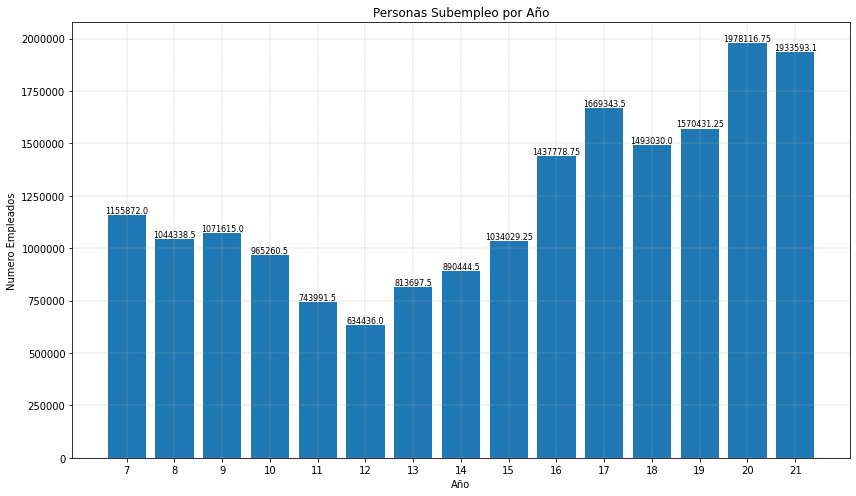

In [30]:
#Buscar Personas Subempleo
print("Buscar Personas Subempleo")
print("Ingrese el rango en el que quiera buscar (Años)")
imrimirMensaje();
print("Ingrese fecha de inicio")
fechaInicio = input();
print("Ingrese fecha de fin")
fechaFin = input();

DatosEmpleados = GetDataset(fechaInicio, fechaFin);
DatosEmpleados = DatosEmpleados[DatosEmpleados.Indicadores.isin(["Subempleo","Total"])]
GraficarHistograma(DatosEmpleados['Periodo'], DatosEmpleados['Total'], 'Subempleo')

Buscar Personas Empleo Adecuado/Pleno
Ingrese el rango en el que quiera buscar (Años)
Ingrese 7 para el año 200 7
Ingrese 8 para el año 200 8
Ingrese 9 para el año 200 9
Ingrese 10 para el año 20 10
Ingrese 11 para el año 20 11
Ingrese 12 para el año 20 12
Ingrese 13 para el año 20 13
Ingrese 14 para el año 20 14
Ingrese 15 para el año 20 15
Ingrese 16 para el año 20 16
Ingrese 17 para el año 20 17
Ingrese 18 para el año 20 18
Ingrese 19 para el año 20 19
Ingrese 20 para el año 20 20
Ingrese 21 para el año 20 21
Ingrese fecha de inicio
7
Ingrese fecha de fin
21


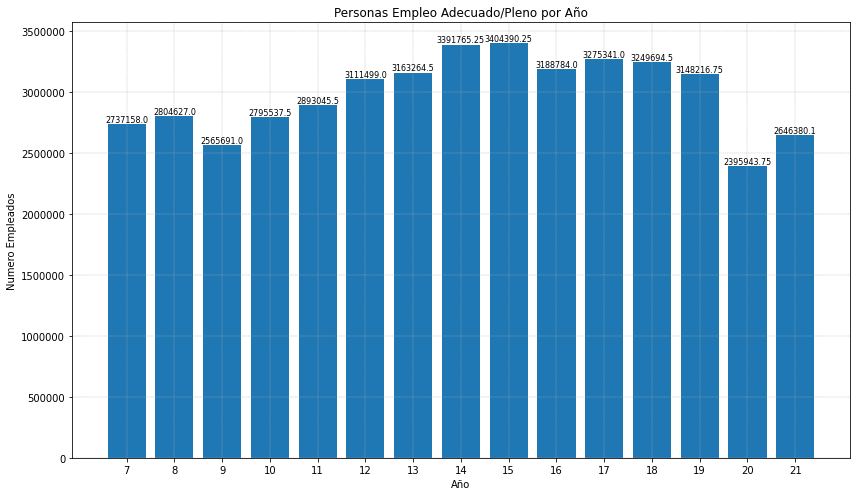

In [32]:
#Buscar Personas Empleo Adecuado/Pleno
print("Buscar Personas Empleo Adecuado/Pleno")
print("Ingrese el rango en el que quiera buscar (Años)")
imrimirMensaje();
print("Ingrese fecha de inicio")
fechaInicio = input();
print("Ingrese fecha de fin")
fechaFin = input();

DatosEmpleados = GetDataset(fechaInicio, fechaFin);
DatosEmpleados = DatosEmpleados[DatosEmpleados.Indicadores.isin(["Empleo Adecuado/Pleno","Total"])]
GraficarHistograma(DatosEmpleados['Periodo'], DatosEmpleados['Total'], 'Empleo Adecuado/Pleno')

Buscar Personas Empleo Otro Empleo no pleno
Ingrese el rango en el que quiera buscar (Años)
Ingrese 7 para el año 200 7
Ingrese 8 para el año 200 8
Ingrese 9 para el año 200 9
Ingrese 10 para el año 20 10
Ingrese 11 para el año 20 11
Ingrese 12 para el año 20 12
Ingrese 13 para el año 20 13
Ingrese 14 para el año 20 14
Ingrese 15 para el año 20 15
Ingrese 16 para el año 20 16
Ingrese 17 para el año 20 17
Ingrese 18 para el año 20 18
Ingrese 19 para el año 20 19
Ingrese 20 para el año 20 20
Ingrese 21 para el año 20 21
Ingrese fecha de inicio
7
Ingrese fecha de fin
21


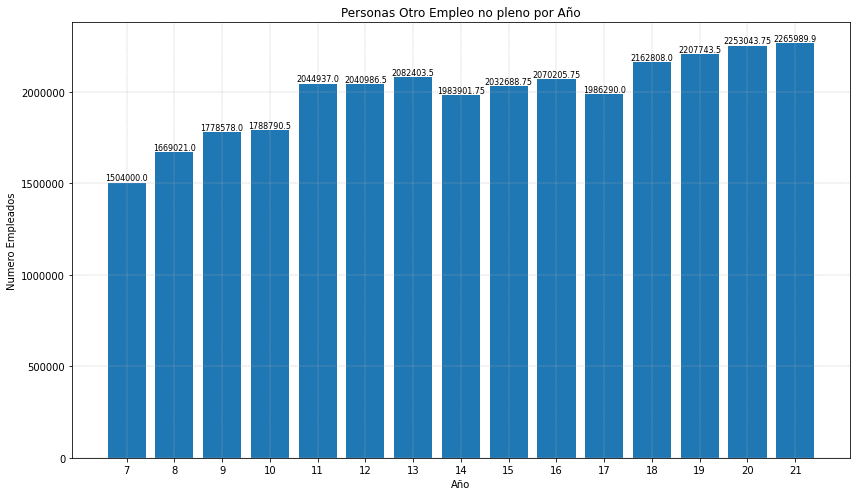

In [33]:
#Buscar Personas Empleo Otro Empleo no pleno
print("Buscar Personas Empleo Otro Empleo no pleno")
print("Ingrese el rango en el que quiera buscar (Años)")
imrimirMensaje();
print("Ingrese fecha de inicio")
fechaInicio = input();
print("Ingrese fecha de fin")
fechaFin = input();

DatosEmpleados = GetDataset(fechaInicio, fechaFin);
DatosEmpleados = DatosEmpleados[DatosEmpleados.Indicadores.isin(["Otro Empleo no pleno","Total"])]
GraficarHistograma(DatosEmpleados['Periodo'], DatosEmpleados['Total'], 'Otro Empleo no pleno')


In [34]:
#Diagrama de pastel segun la sectorizacion
print("Diagrama Pie")
print("Ingrese el rango en el que quiera buscar (Años)")
imrimirMensaje();
print("Año")
anio = input();

print("Urbana")
Urbano = ObtenerSectores(anio).iloc[-18:]
Urbano['Urbana'] = Urbano['Urbana'].apply(EliminarPuntos);
GraficarPie(Urbano['Urbana'], Urbano['Indicadores']);


print("Rural")
Rural = ObtenerSectores(anio).iloc[-18:]
Rural['Rural'] = Rural['Rural'].apply(EliminarPuntos);
GraficarPie(Rural['Rural'], Rural['Indicadores']);



Diagrama Pie
Ingrese el rango en el que quiera buscar (Años)
Ingrese 7 para el año 200 7
Ingrese 8 para el año 200 8
Ingrese 9 para el año 200 9
Ingrese 10 para el año 20 10
Ingrese 11 para el año 20 11
Ingrese 12 para el año 20 12
Ingrese 13 para el año 20 13
Ingrese 14 para el año 20 14
Ingrese 15 para el año 20 15
Ingrese 16 para el año 20 16
Ingrese 17 para el año 20 17
Ingrese 18 para el año 20 18
Ingrese 19 para el año 20 19
Ingrese 20 para el año 20 20
Ingrese 21 para el año 20 21
Año
7
Urbana


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Rural


21
#Estadistica descriptiva de los datos

En esta seccion se analizara los datos graficados anteriormente para lo cual se implementara la herramienta .describe() el cual nos devuelve un conjunto de datos de estadísticas descriptivas.

In [35]:
EmpleadosDataFrame = dataFrame[dataFrame.Indicadores.isin(["Empleo","Total"])]
print("Datos Empleo \n ",EmpleadosDataFrame.describe())
print("\n")
DesempleoDataFrame = dataFrame[dataFrame.Indicadores.isin(["Desempleo","Total"])]
print("Datos Desempleo \n ",DesempleoDataFrame.describe())
print("\n")
SubempleoDataFrame = dataFrame[dataFrame.Indicadores.isin(["Subempleo","Total"])]
print("Datos Subempleo \n ",SubempleoDataFrame.describe())
print("\n")
EmpleoAdecuadoPlenoDataFrame = dataFrame[dataFrame.Indicadores.isin(["Empleo Adecuado/Pleno","Total"])]
print("Datos Empleo Adecuado/Pleno \n ",EmpleoAdecuadoPlenoDataFrame.describe())
print("\n")
OtroEmpleonoplenoDataFrame = dataFrame[dataFrame.Indicadores.isin(["Otro Empleo no pleno","Total"])]
print("Datos Otro Empleo no pleno \n ",OtroEmpleonoplenoDataFrame.describe())

Datos Empleo 
           Periodo         Total
count  15.000000  1.500000e+01
mean   14.000000  6.952479e+06
std     4.472136  7.362216e+05
min     7.000000  6.019332e+06
25%    10.500000  6.204197e+06
50%    14.000000  6.784414e+06
75%    17.500000  7.719819e+06
max    21.000000  7.917790e+06


Datos Desempleo 
           Periodo          Total
count  15.000000      15.000000
mean   14.000000  355114.363333
std     4.472136   56871.589568
min     7.000000  279372.500000
25%    10.500000  310626.000000
50%    14.000000  358466.500000
75%    17.500000  394737.250000
max    21.000000  456457.500000


Datos Subempleo 
           Periodo         Total
count  15.000000  1.500000e+01
mean   14.000000  1.229065e+06
std     4.472136  4.250236e+05
min     7.000000  6.344360e+05
25%    10.500000  9.278525e+05
50%    14.000000  1.071615e+06
75%    17.500000  1.531731e+06
max    21.000000  1.978117e+06


Datos Empleo Adecuado/Pleno 
           Periodo         Total
count  15.000000  1.500000e+01
m

#Reporte

En esta seccion se implementara metodos para la obtencion del reporte para lo cual se utilizara la libreria de datapane

In [37]:
##Reporte
!pip install datapane

In [39]:
import datapane as dp

In [40]:
#Funcion para graficar Reporte grafica histograma

def GraficarHistogramaReportehisto(Periodo, Total, etiqueta):
    fig, ax = plt.subplots(figsize =(12, 7))
    imagen =  plt.bar( Periodo,Total)

    try:
        plt.ticklabel_format(axis='y', style='plain')
    except AttributeError:
        print('')
    plt.title('Personas '+ etiqueta +' por Año')
    plt.xlabel('Año')
    plt.ylabel('Numero Empleados')
    plt.grid(linestyle='--', linewidth=0.4)
    for index,data in enumerate(Total):
        plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=8), ha='center', va='bottom')
    plt.tight_layout()
    
    return fig

In [41]:
#Funcion para graficar en el reporte grafica diagramaPie

def GraficarHistogramaReporte(datos, etiquetas):
    vec=[]
    vec1=[]
    for x in datos:
        vec.append(x);
    for y in etiquetas:
        vec1.append(y)
      
    fig = px.pie(values=vec, names=vec1) 
    
    return fig


In [42]:
def crearReporte(anioInicio, aniofin):
    DatosEmpleados = GetDataset(anioInicio, aniofin);
    DatosEmpleados = DatosEmpleados[DatosEmpleados.Indicadores.isin(["Empleo","Total"])]
    img = GraficarHistogramaReportehisto(DatosEmpleados['Periodo'], DatosEmpleados['Total'], 'Empleo')

    DatosDesempleo = GetDataset(anioInicio, aniofin);
    DatosDesempleo = DatosDesempleo[DatosDesempleo.Indicadores.isin(["Desempleo","Total"])]
    img2 = GraficarHistogramaReportehisto(DatosDesempleo['Periodo'], DatosDesempleo['Total'], 'Desempleo')
    
    Rural = ObtenerSectores(aniofin).iloc[-18:]
    Rural['Rural'] = Rural['Rural'].apply(EliminarPuntos);
    img3 = GraficarHistogramaReporte(Rural['Rural'], Rural['Indicadores']);
    
    Urbano = ObtenerSectores(aniofin).iloc[-18:]
    Urbano['Urbana'] = Urbano['Urbana'].apply(EliminarPuntos);
    img4 = GraficarHistogramaReporte(Urbano['Urbana'], Urbano['Indicadores']);
    
    totalSubIndices = DatosSumempleoEmpleoPleno();
    
    conclucion = 'ssasadsfsdfsf';

    report = dp.Report(dp.Text("""## Reporte """),dp.Text("""## Nombre: Christian Rivera """),dp.Text("""## Datos Empleo"""), dp.Plot(img),dp.Text("""## Estadisticas"""),dp.Table(DatosEmpleados.describe()),dp.Text("""##Datos Desempleo"""), dp.Plot(img2),dp.Text("""## Estadisticas"""),dp.Table(DatosDesempleo.describe()), dp.Text("""## Sector Rural"""),dp.Plot(img3), dp.Text("""## Sector Urbana"""),dp.Plot(img4))
    file_name = "reporte.html"
    report.save(path=file_name,open=True)

In [ ]:
#Diagrama de pastel segun la sectorizacion
print("Generar Reporte")
print("Ingrese el rango en el que quiera buscar (Años)")
imrimirMensaje();
print("Ingrese fecha de inicio")
fechaInicio = input();

print("Ingrese fecha de fin")
fechafin = input();


crearReporte(fechaInicio,fechafin);

#Análisis
El conjunto de datos analizados nos muestra que la población del Ecuador en el ámbito laboral ha ido incrementando esto en base a las graficas obtenidas lo cual nos muestra que entre el año 2007 y 2021 se ha generado diferente medios de trabajo por lo que la población ha obtenido empleos de una manera creciente, sim embargo existe una población de personas que no cuentan con un empleo el cual como muestra el grafico “Personas Desempleadas por Año”  nos indica que en los últimos 2 años el desempleo a sido muy notorio en la población ecuatoriana.

Al aplicar un tratamiento y análisis de datos también podemos inferir que la población con la edad de trabajar es la población que mas abarca puestos laborales, por lo que podemos sostener que los que no se encuentran en esa categoría muchos se encuentran en una etapa en la que se vuelve difícil obtener un empleo.

#Conclusiones 
Aplicar un procesamiento y análisis de datos mediante graficas resulta muy comprensible esto debido a que se puede analizar de manera visual un conjunto masivo de datos, el uso de diferentes herramientas nos permite entender y presentar datos que puedan ser entendibles para una persona natural entre muchas utilidades más, existen muchos programas y aplicaciones para el tratamiento de datos pero concluimos que el lenguaje Python y sus herramientas resultan la herramienta más rápida y con mas funcionalidades para la manipulación de datos.

Link Google Colab : https://colab.research.google.com/drive/1IQ12uMzn-HUWZ_nT6lUIE7thrb2vXVlT?usp=sharing

[NbConvertApp] WARNING | pattern u'/content/Prueba1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--inplace
    